First few rows:
   Unnamed: 0                date   open   high    low  close  volume  \
0           0  20090522  07:30:00  89.45  89.46  89.37  89.37    7872   
1           1  20090522  07:31:00  89.38  89.53  89.37  89.50    5336   
2           2  20090522  07:32:00  89.51  89.54  89.48  89.49    3349   
3           3  20090522  07:33:00  89.49  89.49  89.31  89.34    3495   
4           4  20090522  07:34:00  89.33  89.46  89.33  89.39    9731   

   barCount  average  
0      2102   89.424  
1      1938   89.468  
2      1184   89.516  
3      1240   89.386  
4      2637   89.379  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070834 entries, 0 to 2070833
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   date        object 
 2   open        float64
 3   high        float64
 4   low         float64
 5   close       float64
 6   volume      int64  
 7   barCount    int64  
 8   average     float64
dtypes: 

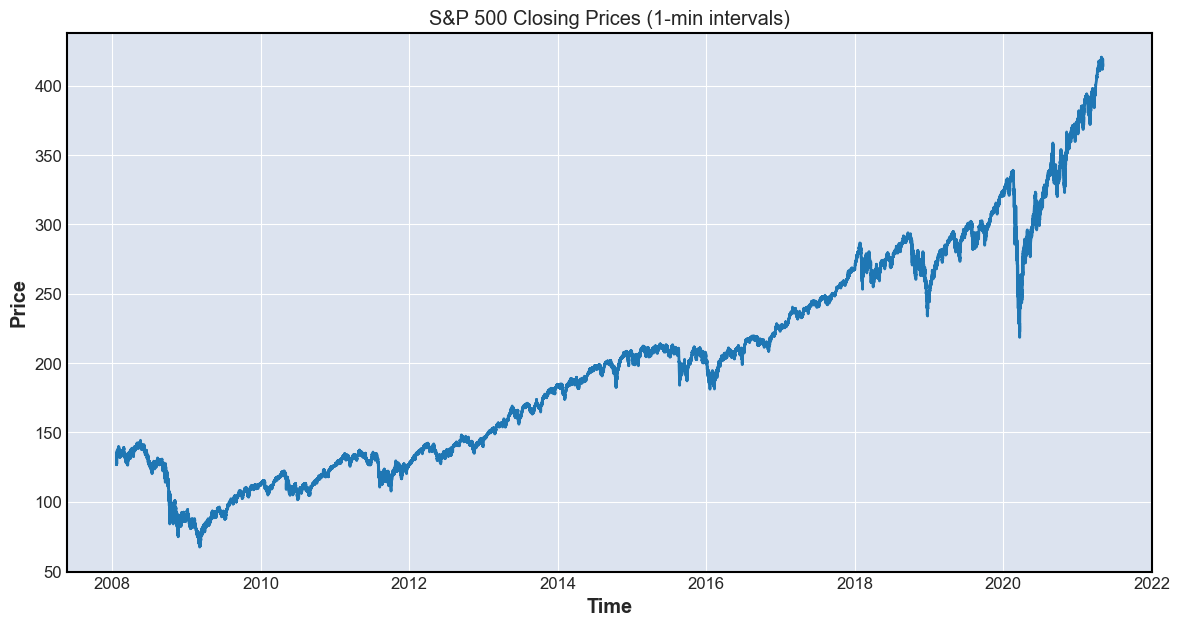

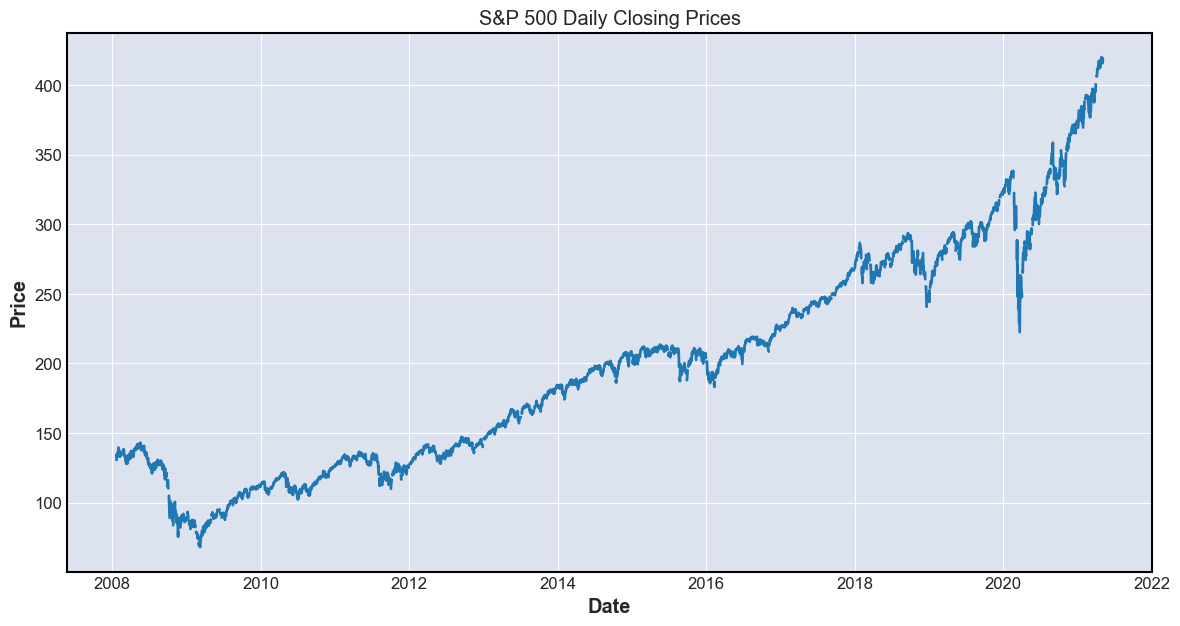

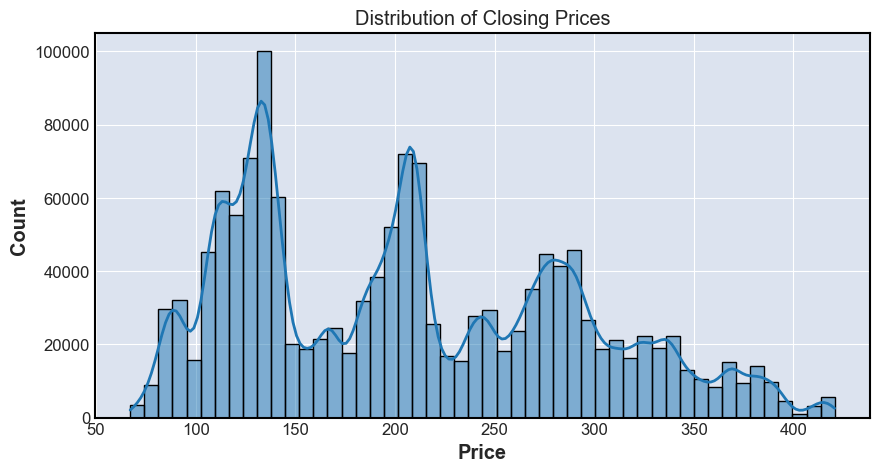

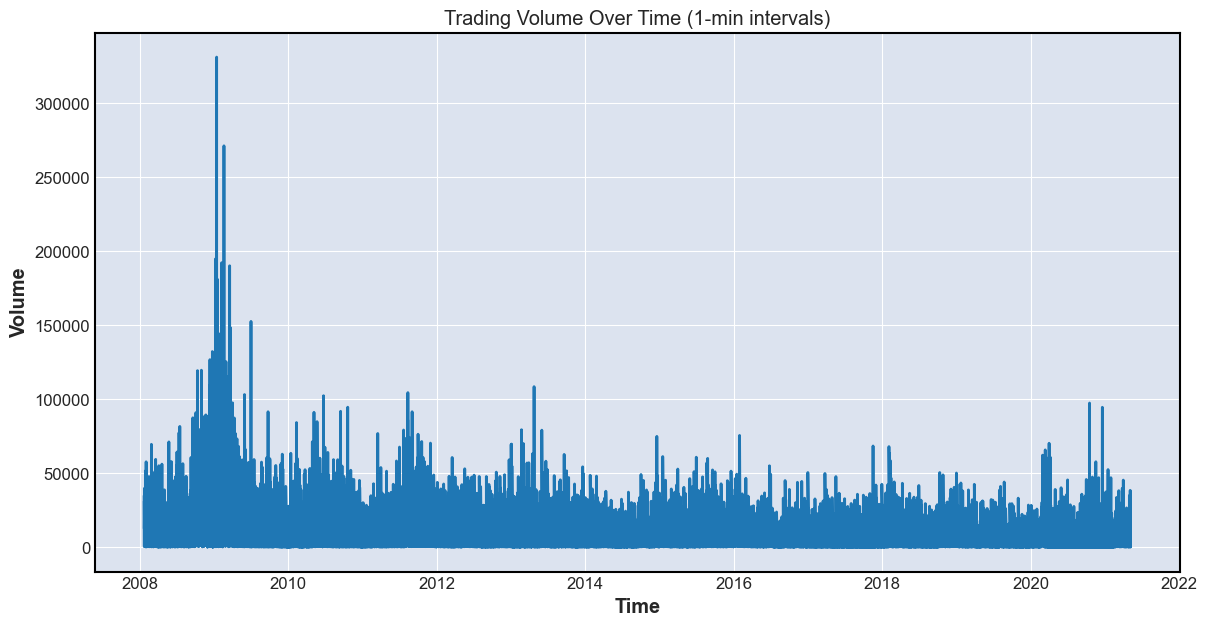

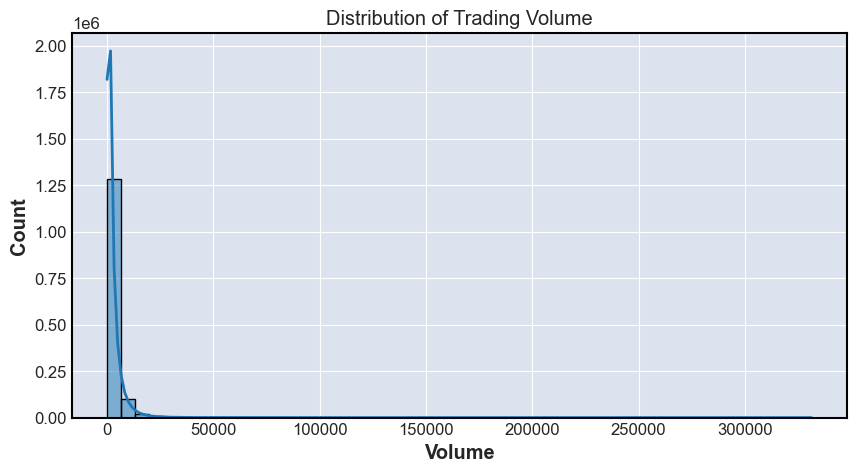

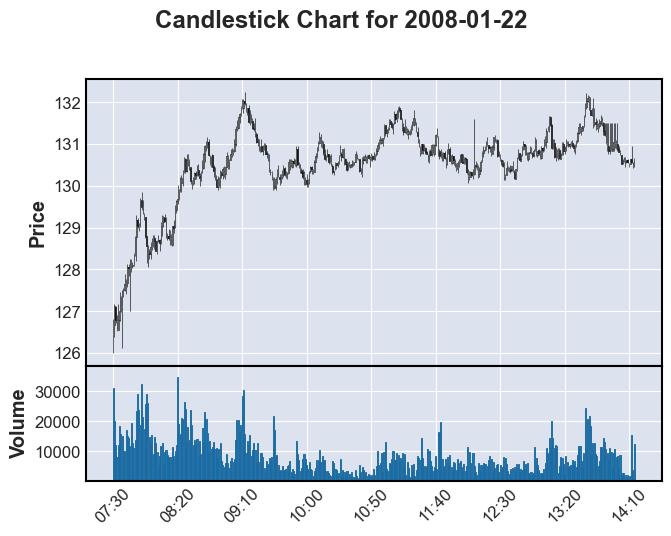


Missing values in daily DataFrame:
open      1507
high      1507
low       1507
close     1507
volume       0
dtype: int64

Checking for inf values in daily_df['close']:
0

Missing values in daily_df after cleaning:
open      0
high      0
low       0
close     0
volume    0
dtype: int64

Rows with inf in daily_df['close'] after cleaning:
0


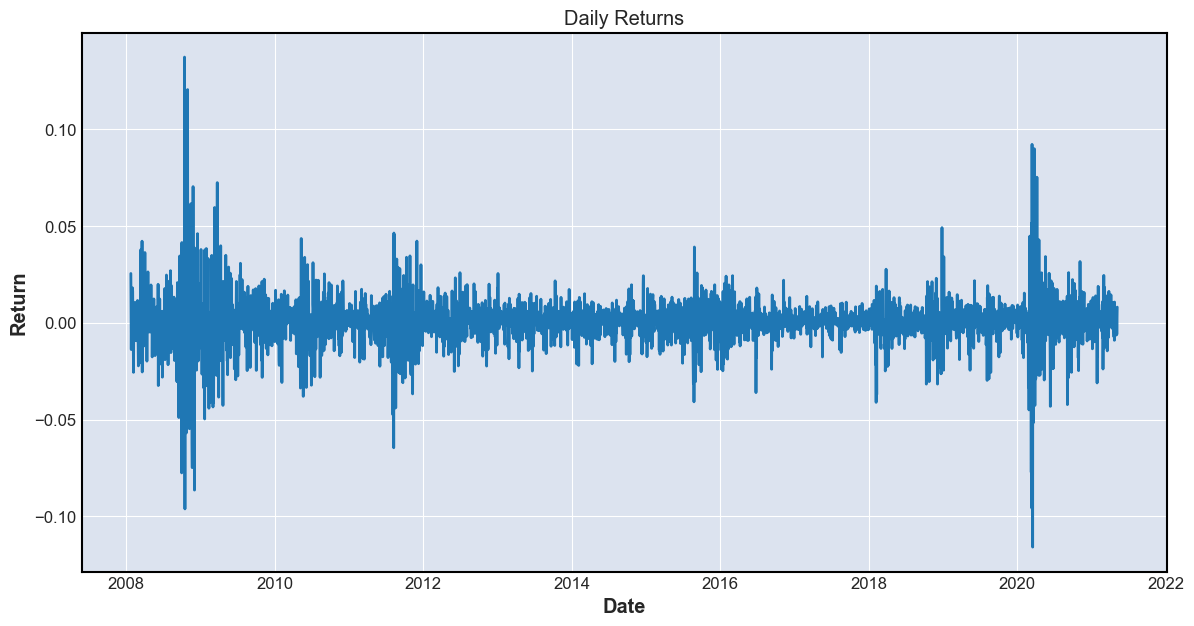

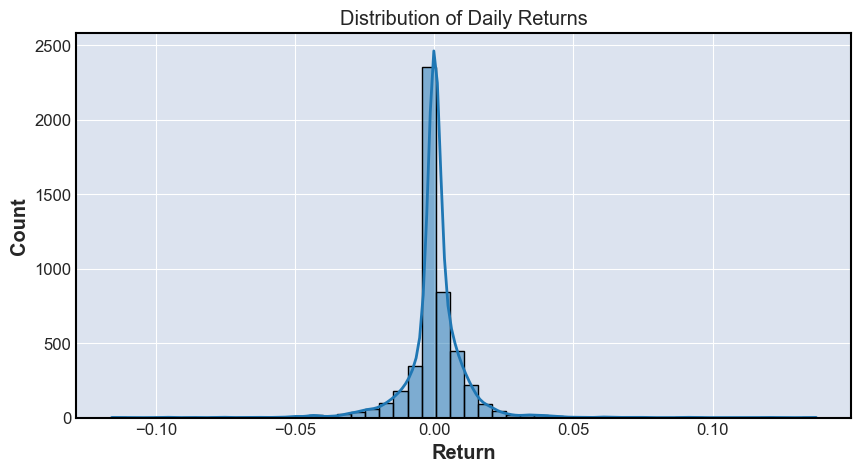

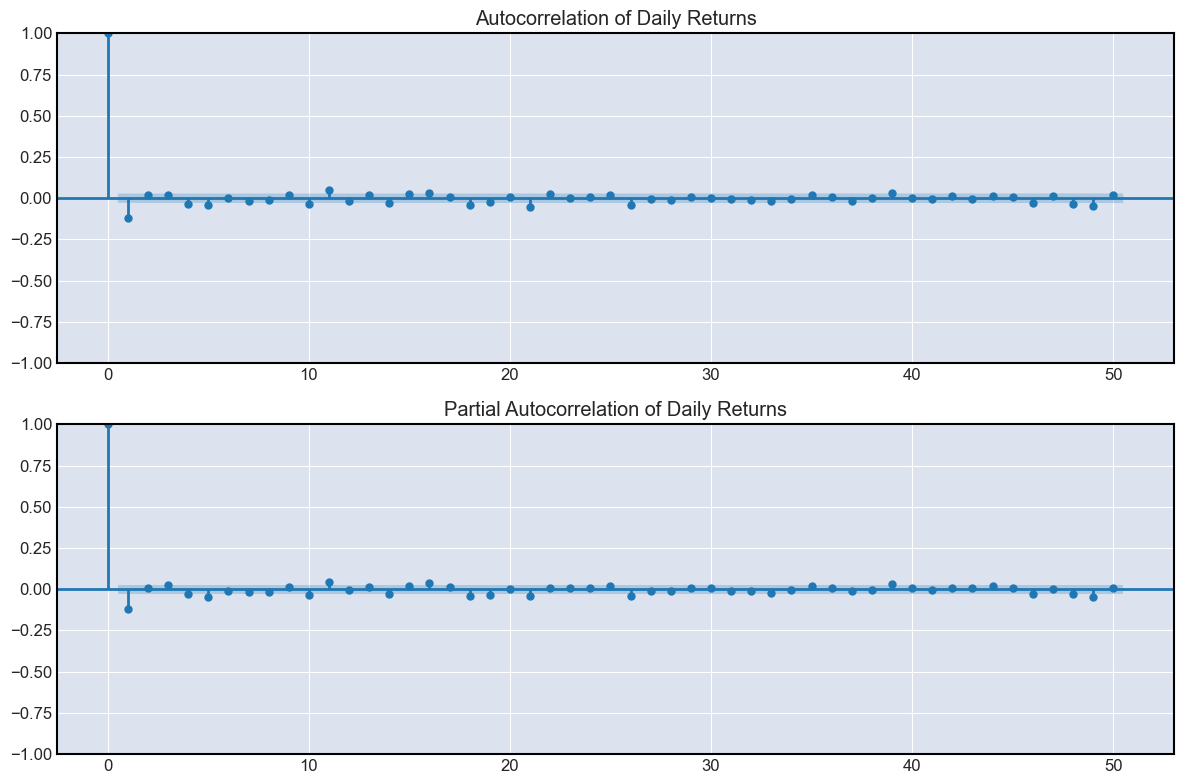

ADF Statistic for Daily Closing Prices: 1.5967445033309935
p-value for Daily Closing Prices: 0.9978477760550647
Interpretation: p > 0.05 suggests non-stationary data
Error: daily_df['return'] still contains NaN or inf values


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the dataset
# Adjust the path if the file is not in Downloads
file_path = r'C:\Users\user\Downloads\1_min_SPY_2008-2021.csv'
df = pd.read_csv(file_path)

# --- Data Inspection ---
print("First few rows:")
print(df.head())
print("\nData info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

# --- Data Cleaning ---
# Drop the unnecessary 'Unnamed: 0' column if present
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Convert 'date' to datetime and set as index
df['Datetime'] = pd.to_datetime(df['date'])
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)

# Drop the 'date' column as it's no longer needed
df.drop('date', axis=1, inplace=True)

# Check column names to confirm
print("\nColumns after setting index:", df.columns)

# Check for missing values
print("\nMissing values in original DataFrame:")
print(df.isnull().sum())

# Handle missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# --- Visualization ---
# 1. Closing Prices Over Time (1-minute intervals)
plt.figure(figsize=(14, 7))
plt.plot(df['close'])
plt.title('S&P 500 Closing Prices (1-min intervals)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

# 2. Daily Closing Prices
daily_close = df['close'].resample('D').last()
plt.figure(figsize=(14, 7))
plt.plot(daily_close)
plt.title('S&P 500 Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 3. Distribution of Closing Prices
plt.figure(figsize=(10, 5))
sns.histplot(df['close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.show()

# 4. Volume Over Time
plt.figure(figsize=(14, 7))
plt.plot(df['volume'])
plt.title('Trading Volume Over Time (1-min intervals)')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()

# 5. Distribution of Volume
plt.figure(figsize=(10, 5))
sns.histplot(df['volume'], bins=50, kde=True)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.show()

# 6. Candlestick Chart for One Day
first_day = df.index[0].date()
one_day = df[df.index.date == first_day]
mpf.plot(one_day, type='candle', volume=True, title=f'Candlestick Chart for {first_day}')

# --- Statistical Analysis ---
# Create daily DataFrame
daily_df = df.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

# Check for NaN or inf values in daily_df
print("\nMissing values in daily DataFrame:")
print(daily_df.isnull().sum())
print("\nChecking for inf values in daily_df['close']:")
print(np.isinf(daily_df['close']).sum())

# Handle missing values in daily_df
daily_df.fillna(method='ffill', inplace=True)  # Forward fill for continuity
# Drop any remaining NaN values if necessary
daily_df.dropna(subset=['close'], inplace=True)

# Verify no NaN or inf values remain
print("\nMissing values in daily_df after cleaning:")
print(daily_df.isnull().sum())
print("\nRows with inf in daily_df['close'] after cleaning:")
print(np.isinf(daily_df['close']).sum())

# Calculate daily returns
daily_df['return'] = daily_df['close'].pct_change()

# 7. Plot Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(daily_df['return'])
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

# 8. Distribution of Daily Returns
plt.figure(figsize=(10, 5))
sns.histplot(daily_df['return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.show()

# 9. Autocorrelation and Partial Autocorrelation of Daily Returns
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(daily_df['return'].dropna(), lags=50, ax=ax[0])
ax[0].set_title('Autocorrelation of Daily Returns')
plot_pacf(daily_df['return'].dropna(), lags=50, ax=ax[1])
ax[1].set_title('Partial Autocorrelation of Daily Returns')
plt.tight_layout()
plt.show()

# 10. Stationarity Test with Augmented Dickey-Fuller
# Ensure no NaN or inf values before ADF test
if daily_df['close'].isna().sum() == 0 and np.isinf(daily_df['close']).sum() == 0:
    result_close = adfuller(daily_df['close'])
    print('ADF Statistic for Daily Closing Prices:', result_close[0])
    print('p-value for Daily Closing Prices:', result_close[1])
    print('Interpretation: p > 0.05 suggests non-stationary data')
else:
    print("Error: daily_df['close'] still contains NaN or inf values")

if daily_df['return'].isna().sum() == 0 and np.isinf(daily_df['return']).sum() == 0:
    result_returns = adfuller(daily_df['return'].dropna())
    print('ADF Statistic for Daily Returns:', result_returns[0])
    print('p-value for Daily Returns:', result_returns[1])
    print('Interpretation: p <= 0.05 suggests stationary data')
else:
    print("Error: daily_df['return'] still contains NaN or inf values")

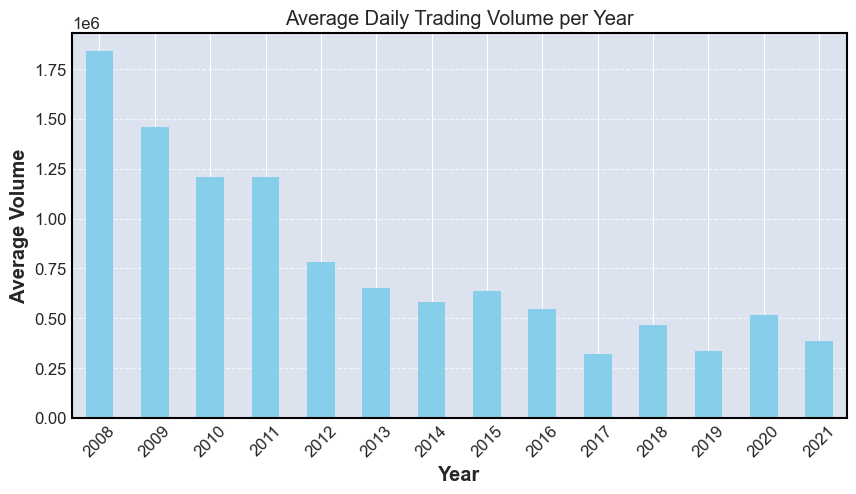

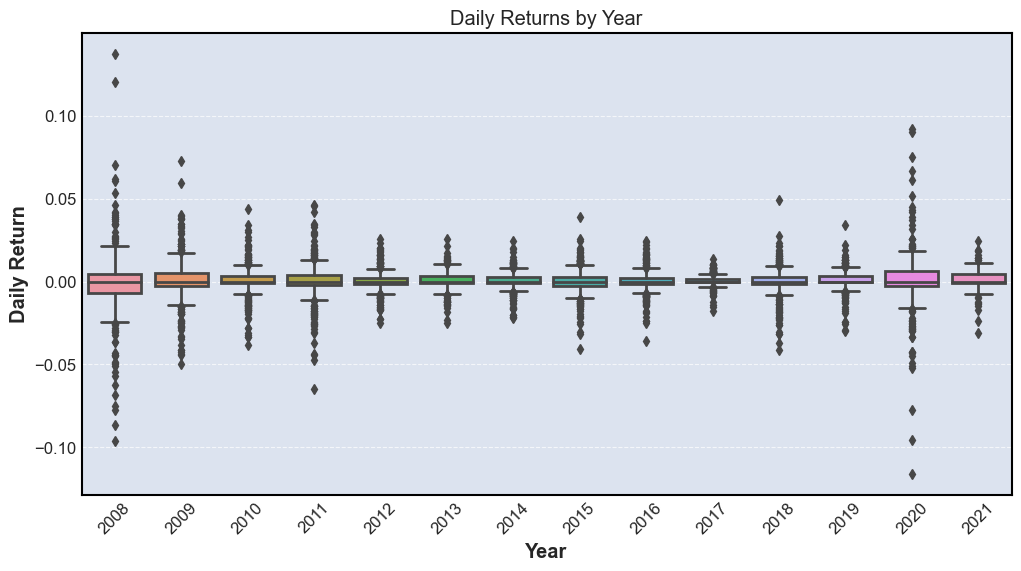

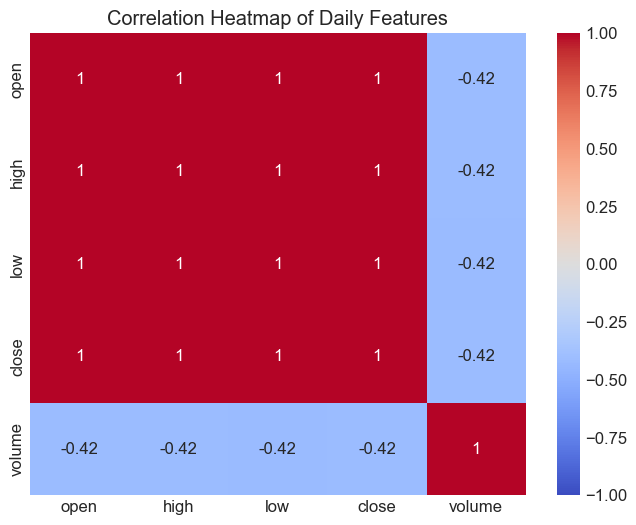

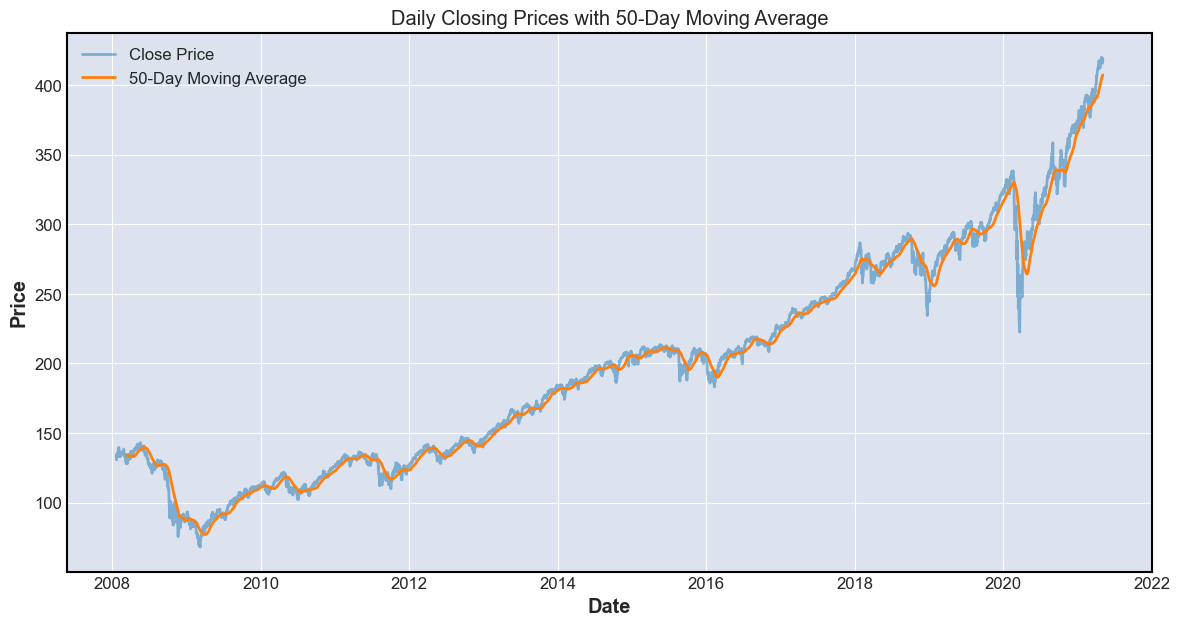

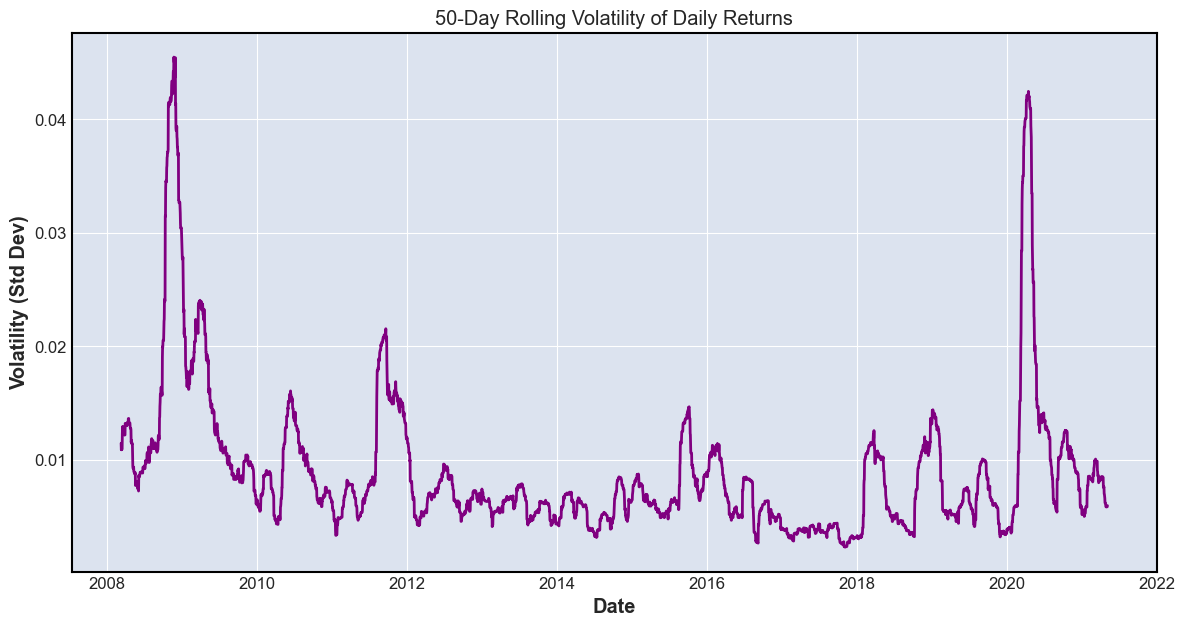


Overfitting/Underfitting Analysis:
Train MSE: 0.000120, Test MSE: 0.000106
Train R²: 0.028932, Test R²: 0.006542

Model Performance Interpretation:
Underfitting detected: Model performs poorly on both training and test data.


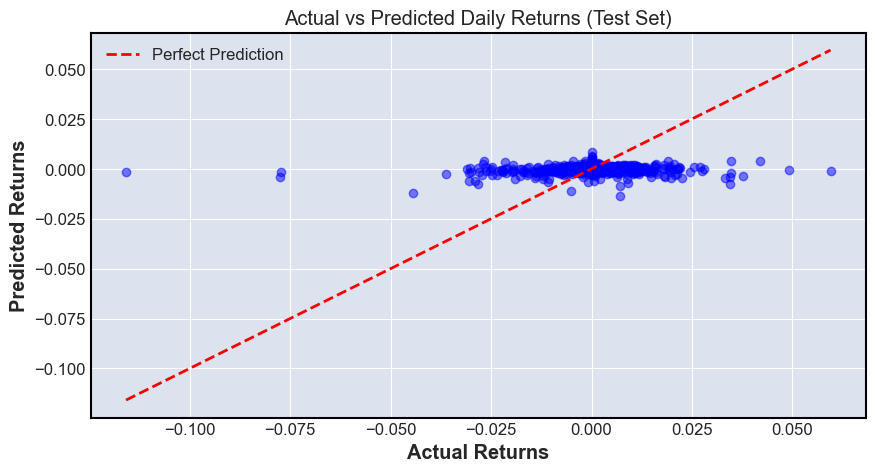


Correlation Matrix:
            open      high       low     close    volume
open    1.000000  0.999861  0.999811  0.999730 -0.419183
high    0.999861  1.000000  0.999648  0.999814 -0.415162
low     0.999811  0.999648  1.000000  0.999808 -0.424478
close   0.999730  0.999814  0.999808  1.000000 -0.420163
volume -0.419183 -0.415162 -0.424478 -0.420163  1.000000


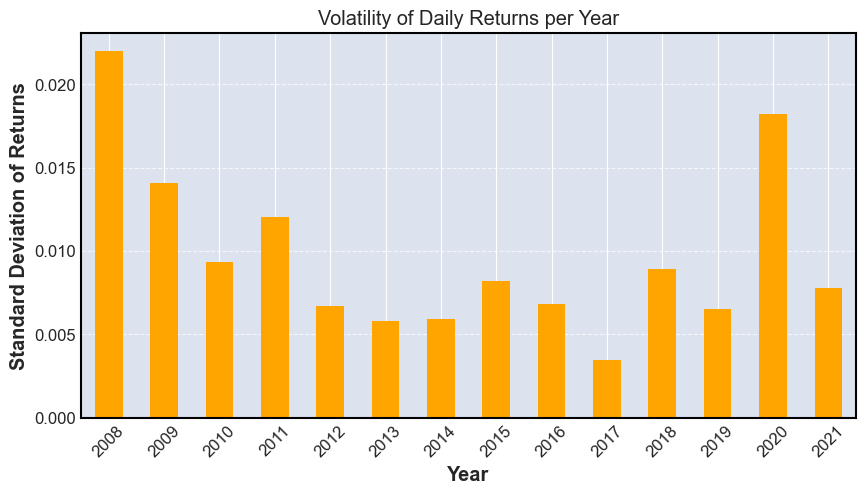

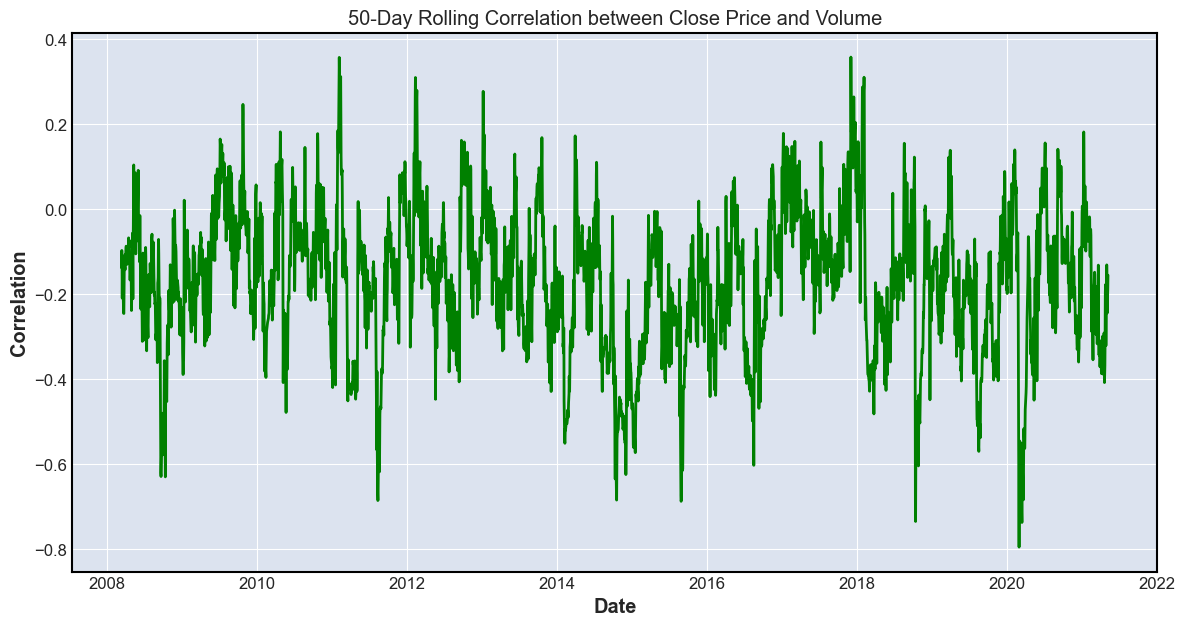

In [6]:
# Import additional libraries for overfitting/underfitting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# --- Additional Visualizations ---
# 1. Bar Chart: Average Daily Volume per Year
daily_df['year'] = daily_df.index.year
yearly_volume = daily_df.groupby('year')['volume'].mean()

# Create a bar chart
plt.figure(figsize=(10, 5))
yearly_volume.plot(kind='bar', color='skyblue')
plt.title('Average Daily Trading Volume per Year')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Box Plot: Daily Returns by Year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='return', data=daily_df)
plt.title('Daily Returns by Year')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(daily_df[['open', 'high', 'low', 'close', 'volume']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Daily Features')
plt.show()

# 4. Moving Average and Volatility
daily_df['ma50'] = daily_df['close'].rolling(window=50).mean()
daily_df['volatility'] = daily_df['return'].rolling(window=50).std()

# Plot moving average
plt.figure(figsize=(14, 7))
plt.plot(daily_df['close'], label='Close Price', alpha=0.5)
plt.plot(daily_df['ma50'], label='50-Day Moving Average', linewidth=2)
plt.title('Daily Closing Prices with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot volatility
plt.figure(figsize=(14, 7))
plt.plot(daily_df['volatility'], color='purple')
plt.title('50-Day Rolling Volatility of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev)')
plt.grid(True)
plt.show()

# --- Overfitting/Underfitting Analysis ---
# Prepare features for predicting daily returns
daily_df['lag1_return'] = daily_df['return'].shift(1)  # 1-day lagged return
daily_df['lag2_return'] = daily_df['return'].shift(2)  # 2-day lagged return
features = daily_df[['lag1_return', 'lag2_return', 'volume']].dropna()
target = daily_df['return'].loc[features.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nOverfitting/Underfitting Analysis:")
print(f"Train MSE: {train_mse:.6f}, Test MSE: {test_mse:.6f}")
print(f"Train R²: {train_r2:.6f}, Test R²: {test_r2:.6f}")

# Interpretation
print("\nModel Performance Interpretation:")
if train_r2 > test_r2 + 0.1 and train_mse < test_mse * 0.5:
    print("Overfitting detected: Model performs significantly better on training data than test data.")
elif train_r2 < 0.1 and test_r2 < 0.1:
    print("Underfitting detected: Model performs poorly on both training and test data.")
else:
    print("Balanced model: Similar performance on training and test data, but check if R² is sufficiently high.")

# Plot actual vs predicted returns
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.title('Actual vs Predicted Daily Returns (Test Set)')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.legend()
plt.grid(True)
plt.show()

# --- Additional Statistical Insights ---
# 5. Correlation Analysis
print("\nCorrelation Matrix:")
print(daily_df[['open', 'high', 'low', 'close', 'volume']].corr())

# 6. Volatility by Year
yearly_volatility = daily_df.groupby('year')['return'].std()
plt.figure(figsize=(10, 5))
yearly_volatility.plot(kind='bar', color='orange')
plt.title('Volatility of Daily Returns per Year')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Returns')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. Rolling Correlation between Close and Volume
daily_df['rolling_corr'] = daily_df['close'].rolling(window=50).corr(daily_df['volume'])
plt.figure(figsize=(14, 7))
plt.plot(daily_df['rolling_corr'], color='green')
plt.title('50-Day Rolling Correlation between Close Price and Volume')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

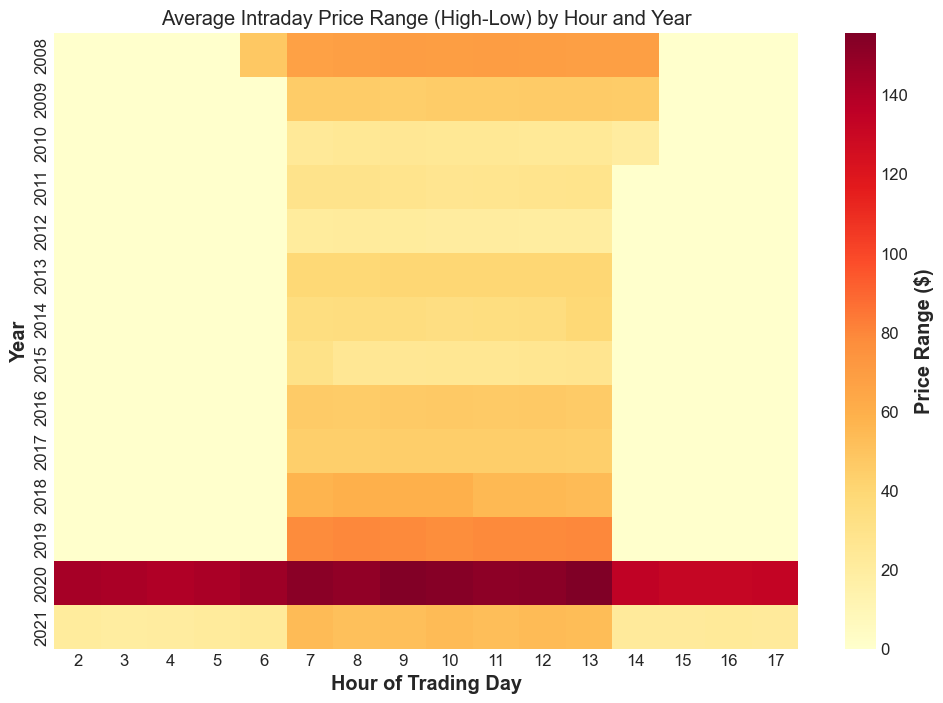

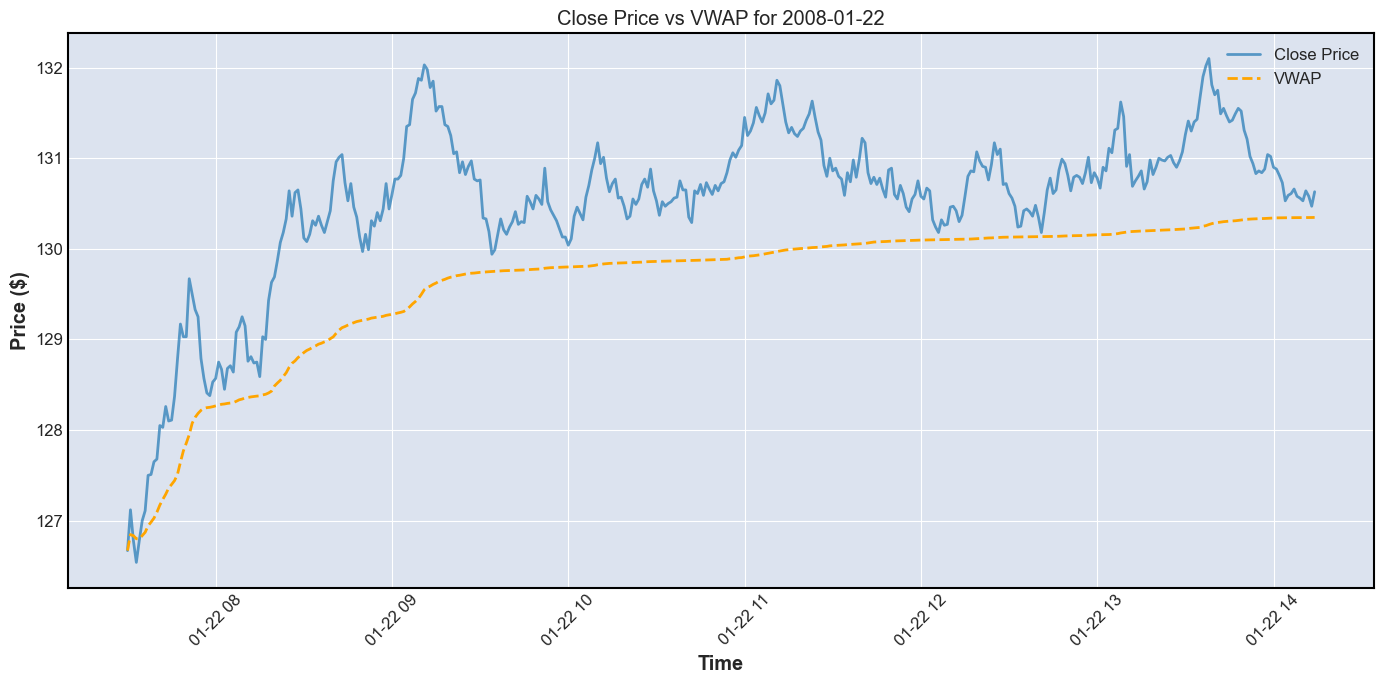

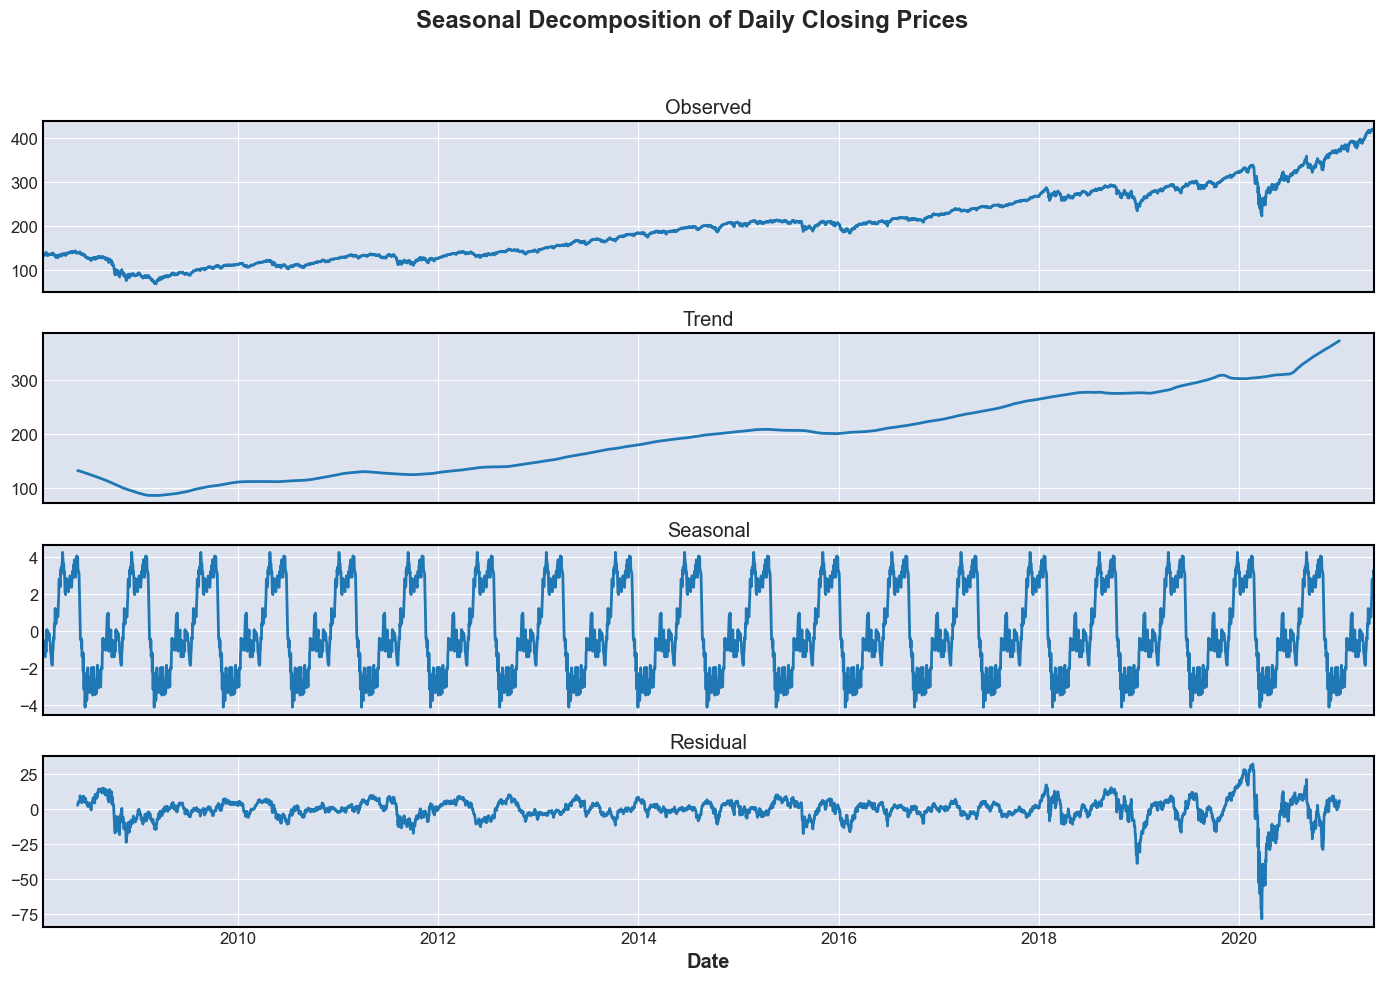

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

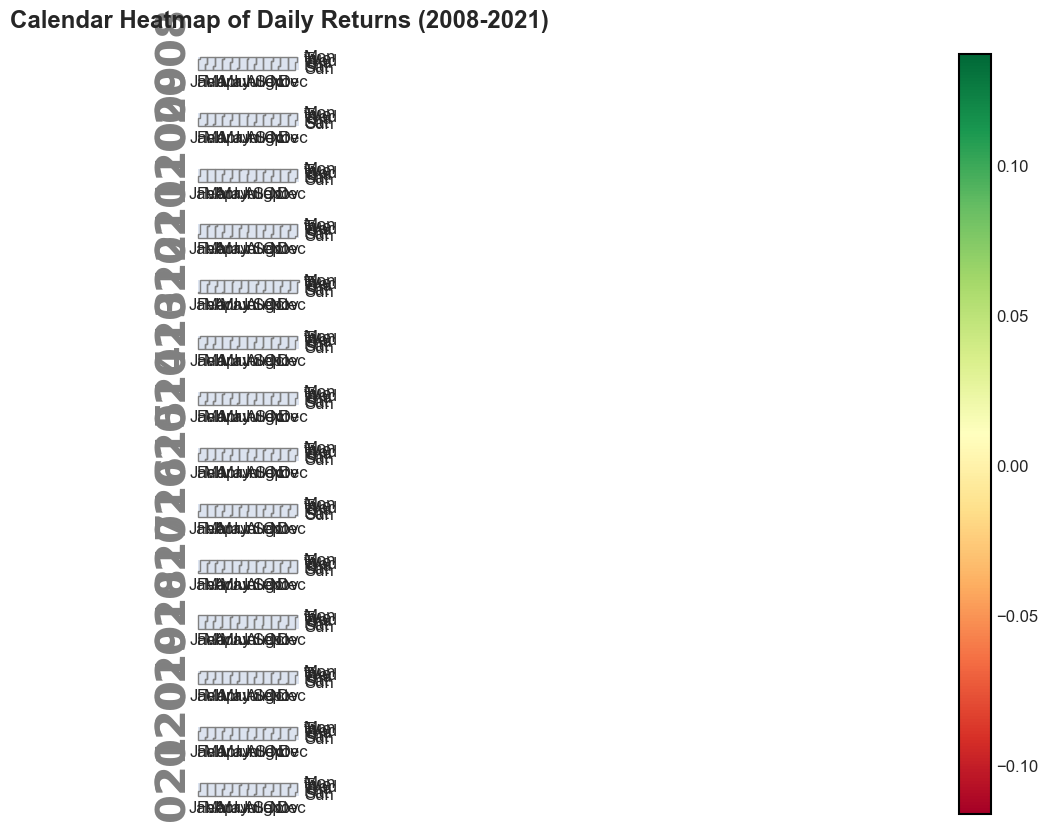


Overfitting/Underfitting Analysis:
Train MSE: 0.000120, Test MSE: 0.000106
Train R²: 0.028932, Test R²: 0.006542


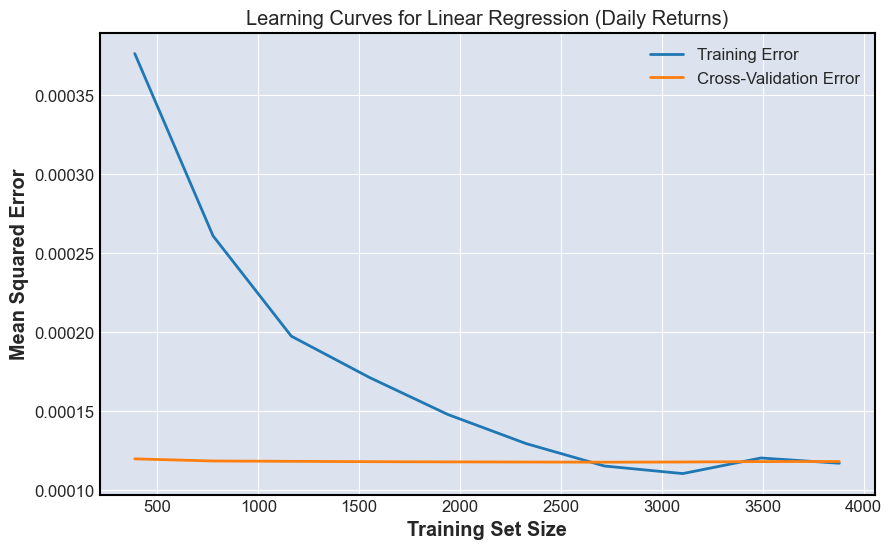


Model Performance Interpretation:
Underfitting: Model is too simple for the data.


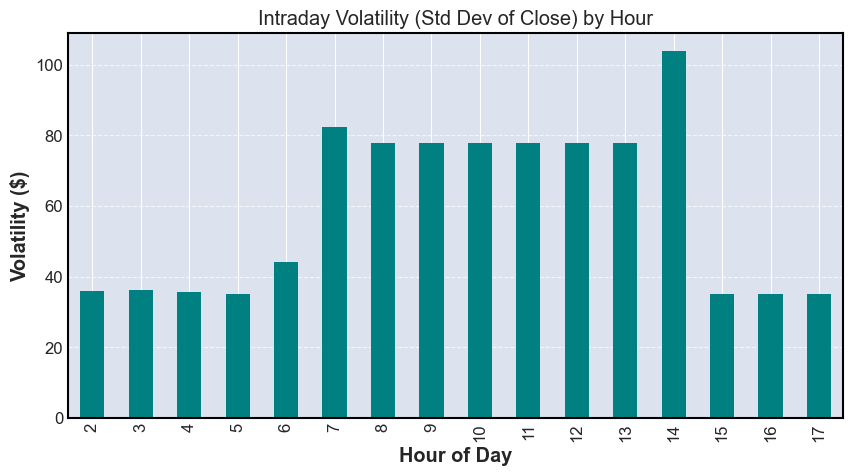

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, learning_curve
import plotly.express as px
import plotly.graph_objects as go
import calplot  # For calendar heatmap
from datetime import datetime
import matplotlib.dates as mdates

# Suppress Helvetica font warnings by setting a fallback font
plt.rcParams['font.family'] = 'Arial'

# Ensure daily_df has year, month, day, and weekday columns
daily_df['year'] = daily_df.index.year
daily_df['month'] = daily_df.index.month
daily_df['day'] = daily_df.index.day
daily_df['weekday'] = daily_df.index.weekday

# --- Unique Visualizations ---
# 1. Intraday Price Range Heatmap (Average High-Low by Hour and Year)
df['hour'] = df.index.hour
df['year'] = df.index.year
price_range = df.groupby(['year', 'hour'])['high'].max() - df.groupby(['year', 'hour'])['low'].min()
price_range = price_range.unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(price_range, cmap='YlOrRd', annot=False, cbar_kws={'label': 'Price Range ($)'})
plt.title('Average Intraday Price Range (High-Low) by Hour and Year')
plt.xlabel('Hour of Trading Day')
plt.ylabel('Year')
plt.show()

# 2. Volume-Weighted Average Price (VWAP) Plot for a Sample Day
sample_day = df[df.index.date == df.index[0].date()].copy()  # Create a copy to avoid SettingWithCopyWarning
sample_day.loc[:, 'cum_volume'] = sample_day['volume'].cumsum()
sample_day.loc[:, 'cum_price_volume'] = (sample_day['close'] * sample_day['volume']).cumsum()
sample_day.loc[:, 'vwap'] = sample_day['cum_price_volume'] / sample_day['cum_volume']

plt.figure(figsize=(14, 7))
plt.plot(sample_day.index, sample_day['close'], label='Close Price', alpha=0.7)
plt.plot(sample_day.index, sample_day['vwap'], label='VWAP', linestyle='--', color='orange')
plt.title(f'Close Price vs VWAP for {sample_day.index[0].date()}')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Seasonal Decomposition of Daily Closing Prices
decomposition = seasonal_decompose(daily_df['close'], model='additive', period=252)  # Approx. trading days in a year
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.suptitle('Seasonal Decomposition of Daily Closing Prices')
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 4. 3D Scatter Plot: Returns, Volume, and Volatility
daily_df['volatility'] = daily_df['return'].rolling(window=20).std()
fig = px.scatter_3d(
    daily_df.dropna(),
    x='return',
    y='volume',
    z='volatility',
    color='year',
    title='3D Scatter: Daily Returns vs Volume vs Volatility',
    opacity=0.5
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

# 5. Calendar Heatmap of Daily Returns
try:
    calplot.calplot(
        daily_df['return'],
        cmap='RdYlGn',
        figsize=(16, 8),
        suptitle='Calendar Heatmap of Daily Returns (2008-2021)',
        colorbar=True
    )
    plt.show()
except Exception as e:
    print(f"Error with calplot: {e}. Using fallback heatmap visualization.")
    # Fallback: Heatmap of average returns by month and year
    monthly_returns = daily_df.groupby(['year', 'month'])['return'].mean().unstack()
    plt.figure(figsize=(12, 8))
    sns.heatmap(monthly_returns, cmap='RdYlGn', annot=True, fmt='.3f', cbar_kws={'label': 'Average Daily Return'})
    plt.title('Average Daily Returns by Month and Year')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()

# --- Overfitting/Underfitting Analysis with Learning Curves ---
# Prepare features for predicting daily returns
daily_df['lag1_return'] = daily_df['return'].shift(1)
daily_df['lag2_return'] = daily_df['return'].shift(2)
features = daily_df[['lag1_return', 'lag2_return', 'volume']].dropna()
target = daily_df['return'].loc[features.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nOverfitting/Underfitting Analysis:")
print(f"Train MSE: {train_mse:.6f}, Test MSE: {test_mse:.6f}")
print(f"Train R²: {train_r2:.6f}, Test R²: {test_r2:.6f}")

# Learning curves
train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), features, target, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Error')
plt.title('Learning Curves for Linear Regression (Daily Returns)')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation
print("\nModel Performance Interpretation:")
if train_r2 > test_r2 + 0.1 and train_mse < test_mse * 0.5:
    print("Overfitting: Model performs much better on training data.")
elif train_r2 < 0.1 and test_r2 < 0.1:
    print("Underfitting: Model is too simple for the data.")
else:
    print("Balanced model: Check if R² is sufficient for your needs.")

# --- Additional Statistical Insights ---
# 6. Intraday Volatility by Hour
intraday_vol = df.groupby('hour')['close'].std()
plt.figure(figsize=(10, 5))
intraday_vol.plot(kind='bar', color='teal')
plt.title('Intraday Volatility (Std Dev of Close) by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Volatility ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
print(daily_df[daily_df['return'].isna()])

              open    high    low   close   volume  return  year  ma50  \
Datetime                                                                 
2008-01-22  126.45  132.25  126.0  130.63  3507370     NaN  2008   NaN   

            volatility  lag1_return  lag2_return  rolling_corr  month  day  \
Datetime                                                                     
2008-01-22         NaN          NaN          NaN           NaN      1   22   

            weekday  
Datetime             
2008-01-22        1  


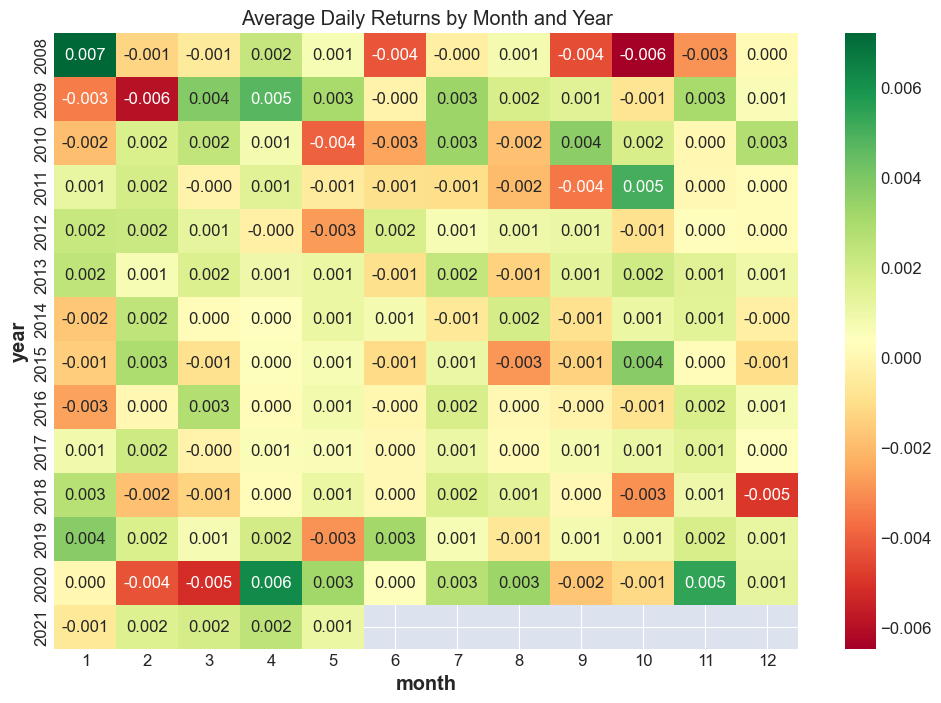

In [14]:
monthly_returns = daily_df.groupby(['year', 'month'])['return'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_returns, cmap='RdYlGn', annot=True, fmt='.3f')
plt.title('Average Daily Returns by Month and Year')
plt.show()

In [11]:
daily_df = daily_df[daily_df['volume'] > 0]


In [15]:
daily_df = df.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
daily_df['return'] = daily_df['close'].pct_change()

In [12]:
fig.write_html('3d_scatter.html')

In [17]:
df = df.head(100000)

Matplotlib version: 3.7.2
Matplotlib cache directory: C:\Users\user\.matplotlib
Matplotlib font family: ['Calibri']
Initial df shape: (2070834, 9)
Columns: Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close', 'volume',
       'barCount', 'average'],
      dtype='object')
daily_df shape: (3347, 8)
daily_df date range: 2008-01-22 00:00:00 to 2021-05-06 00:00:00
Missing values in df:
 open        0
high        0
low         0
close       0
volume      0
barCount    0
average     0
dtype: int64
Missing values in daily_df:
 open        0
high        0
low         0
close       0
volume      0
average     0
barCount    0
return      1
dtype: int64
Infinite values in daily_df:
 open      0
high      0
low       0
close     0
volume    0
dtype: int64
After cleaning, df shape: (1413548, 7)
After cleaning, daily_df shape: (3347, 8)


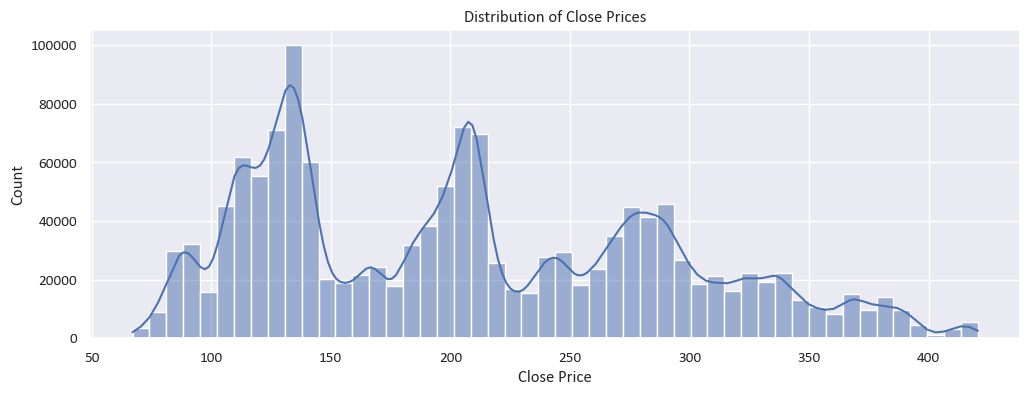

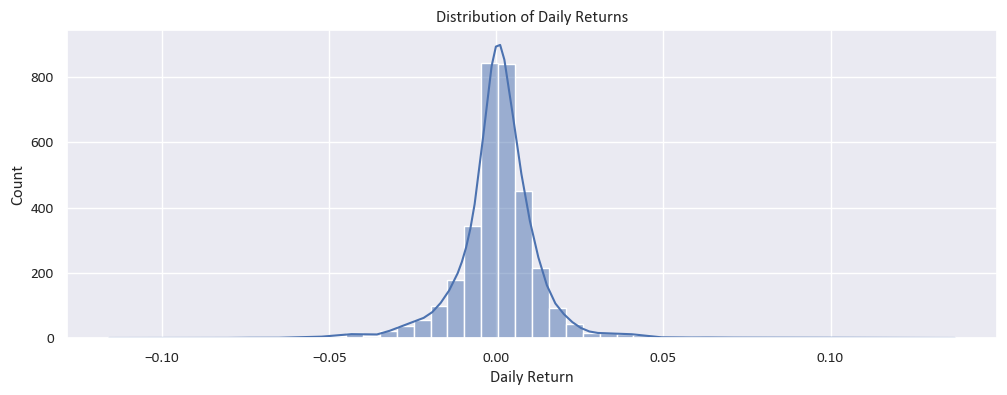

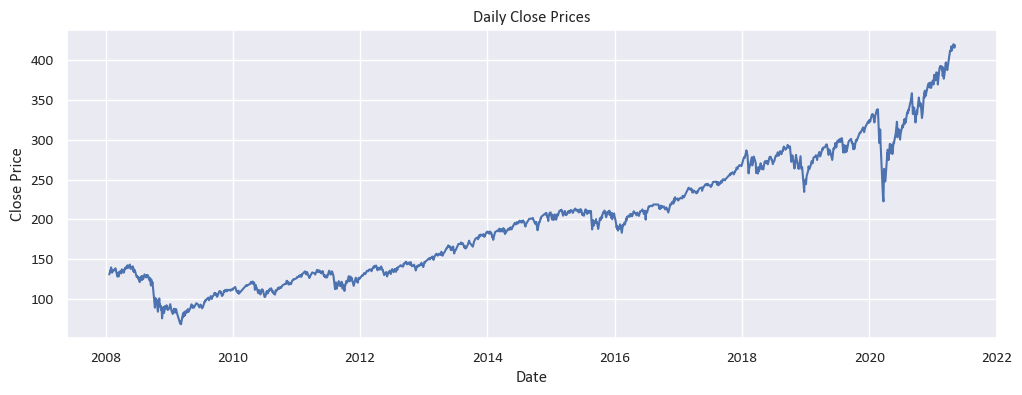

ADF Test for Returns: Statistic = -14.653596254324603 p-value = 3.4693230260833335e-27
Selected day data:
              open  high    low  close   volume    average  barCount    return  \
Datetime                                                                        
2009-05-22  89.45  90.0  88.68  89.05  5918208  89.553328   1533340 -0.001682   

            year  volatility  lag1_return  
Datetime                                   
2009-05-22  2009    0.016339    -0.015126  


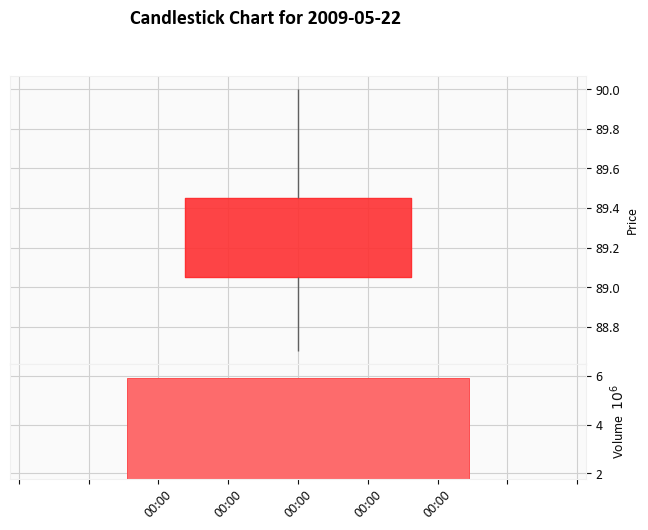

Number of outliers in returns: 291


<Figure size 1200x800 with 0 Axes>

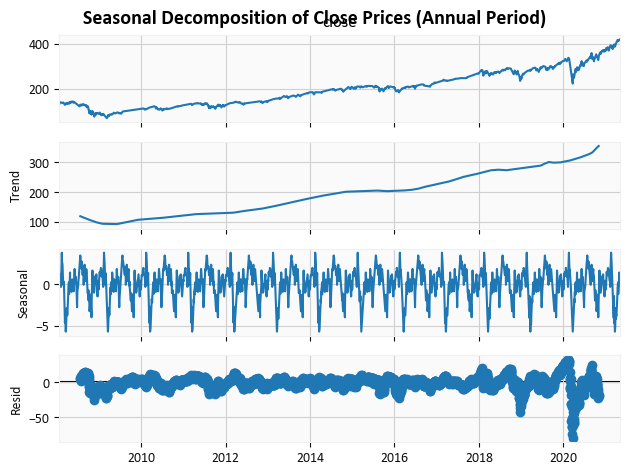

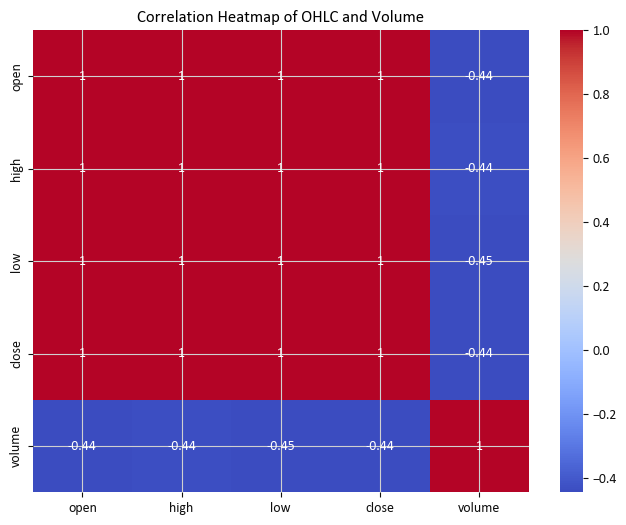

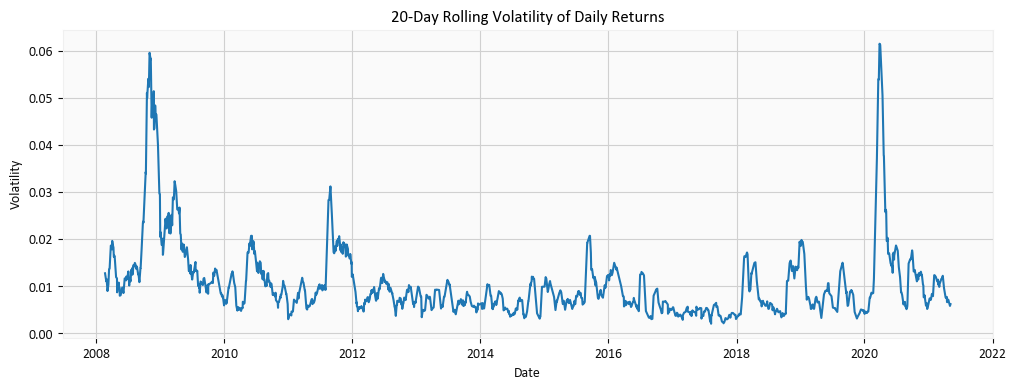

Train R²: 0.002068483025286505
Test R²: -0.020528534006131638


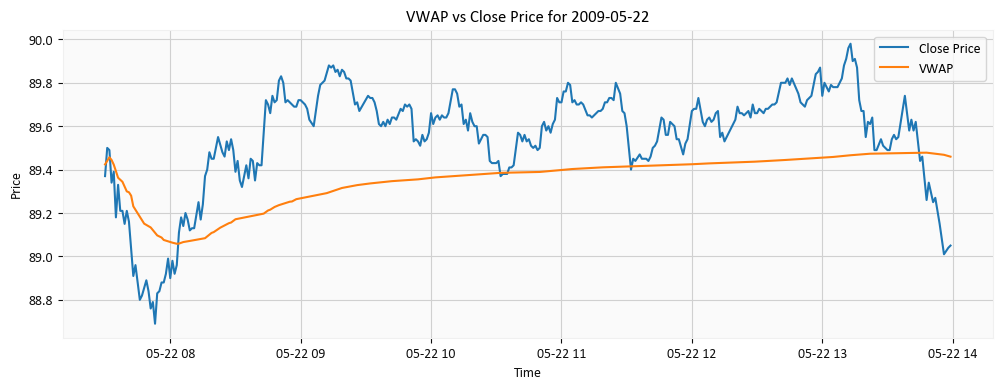

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

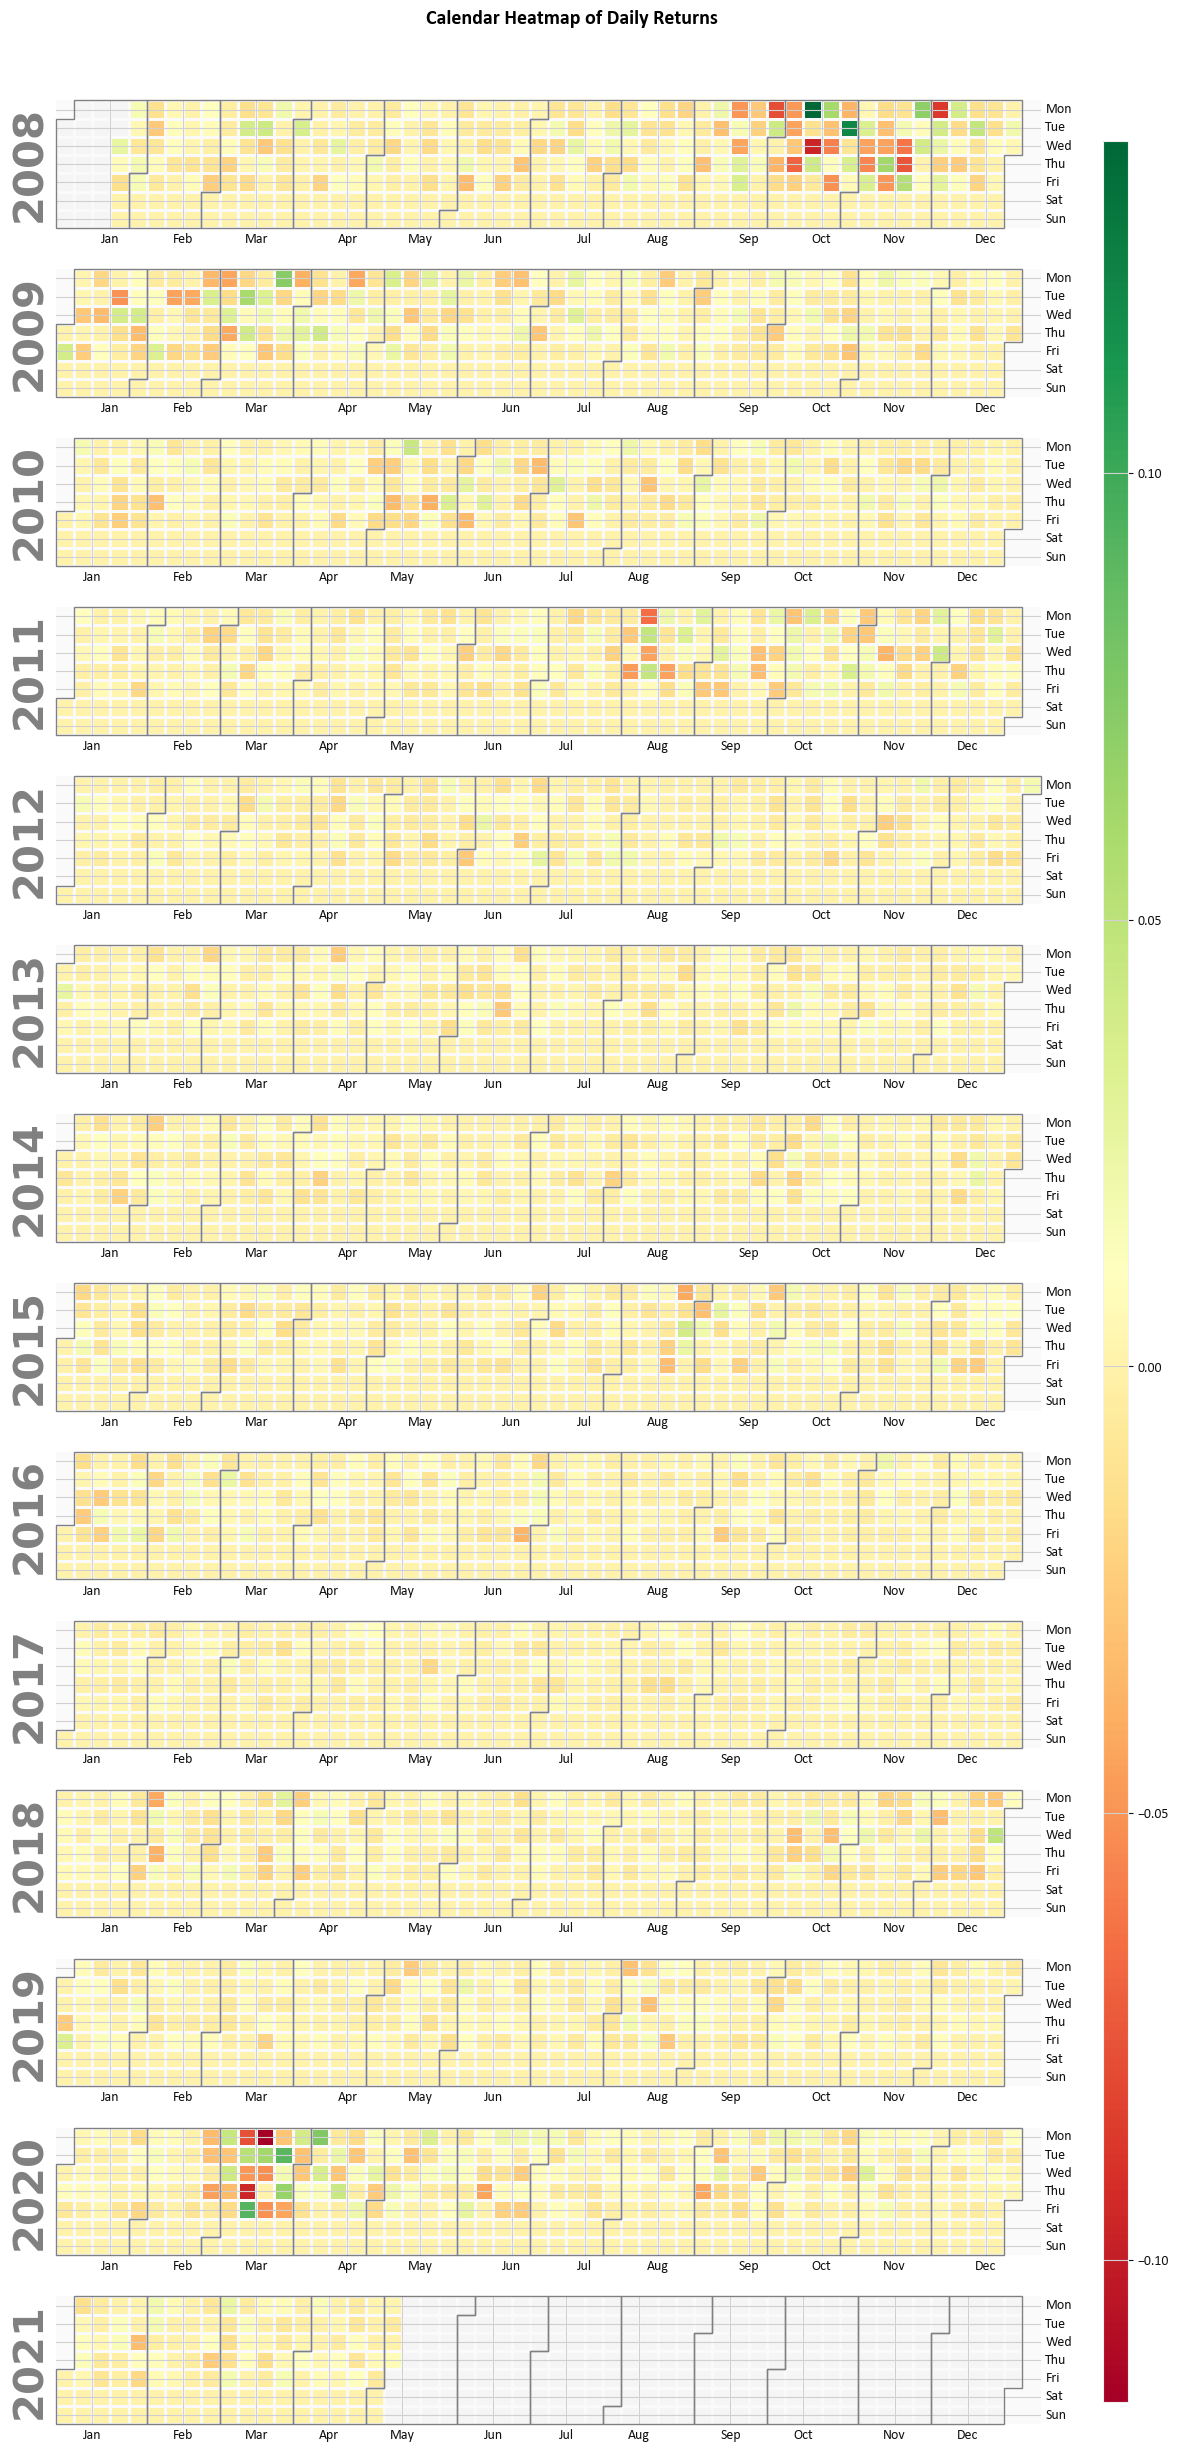

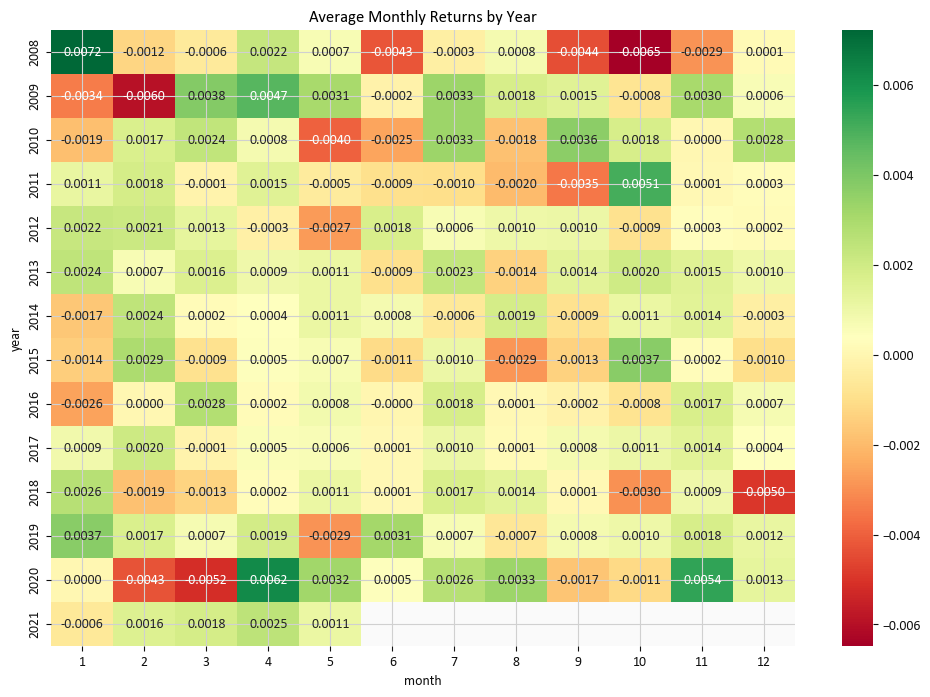

In [29]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import mplfinance as mpf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings

# Suppress findfont warnings as fallback
warnings.filterwarnings("ignore", message="findfont: Font family.*not found")

# Print Matplotlib version and cache directory
print("Matplotlib version:", matplotlib.__version__)
print("Matplotlib cache directory:", matplotlib.get_cachedir())

# Set minimal font configuration
plt.rcParams['font.family'] = 'Calibri'

# Verify font settings
print("Matplotlib font family:", plt.rcParams['font.family'])

# Reset seaborn to use same font
sns.set(rc={'font.family': 'Calibri'})

# Custom style for mplfinance
mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.family': 'Calibri'})

# 1. Data Loading and Initial Setup
df = pd.read_csv('1_min_SPY_2008-2021.csv')  # Adjust path
print("Initial df shape:", df.shape)
print("Columns:", df.columns)

# Convert 'date' to datetime and set as index
df['Datetime'] = pd.to_datetime(df['date'])
df = df.set_index('Datetime')
df = df.drop(columns=['date', 'Unnamed: 0'], errors='ignore')

# Create daily_df by resampling
daily_df = df.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'average': 'mean',
    'barCount': 'sum'
})
daily_df['return'] = daily_df['close'].pct_change()
daily_df = daily_df[daily_df['volume'] > 0]
print("daily_df shape:", daily_df.shape)
print("daily_df date range:", daily_df.index.min(), "to", daily_df.index.max())

# 2. Data Quality Assessment
print("Missing values in df:\n", df.isnull().sum())
print("Missing values in daily_df:\n", daily_df.isnull().sum())
print("Infinite values in daily_df:\n", np.isinf(daily_df[['open', 'high', 'low', 'close', 'volume']]).sum())

# 3. Data Cleaning
df = df.drop_duplicates()
df = df.fillna(method='ffill')
daily_df = daily_df.dropna(subset=['close'])
print("After cleaning, df shape:", df.shape)
print("After cleaning, daily_df shape:", daily_df.shape)

# 4. Univariate Analysis (histograms)
plt.figure(figsize=(12, 4))
sns.histplot(df['close'], bins=50, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.show()

plt.figure(figsize=(12, 4))
sns.histplot(daily_df['return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

# 5. Bivariate/Multivariate Analysis (3D scatter plot)
daily_df['year'] = daily_df.index.year
daily_df['volatility'] = daily_df['return'].rolling(window=20).std()
fig = px.scatter_3d(daily_df.dropna(), x='return', y='volume', z='volatility', color='year')
fig.update_layout(title='3D Scatter: Returns vs Volume vs Volatility')
fig.write_html('3d_scatter.html')

# 6. Time Series Analysis (trend plot and stationarity test)
plt.figure(figsize=(12, 4))
plt.plot(daily_df['close'])
plt.title('Daily Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

result = adfuller(daily_df['return'].dropna())
print('ADF Test for Returns: Statistic =', result[0], 'p-value =', result[1])

# 7. Feature Engineering (advanced features)
daily_df['lag1_return'] = daily_df['return'].shift(1)
df['hour'] = df.index.hour
df['vwap'] = (df['average'] * df['volume']).cumsum() / df['volume'].cumsum()

# 8. Visualization (candlestick chart for a sample day)
target_date = pd.to_datetime('2009-05-22')
if target_date in daily_df.index:
    sample_date = target_date
else:
    print(f"'{target_date.date()}' not found. Selecting closest trading day.")
    sample_date = daily_df.index[daily_df.index >= target_date][0]

one_day = daily_df.loc[sample_date:sample_date]
print("Selected day data:\n", one_day)

if not one_day.empty:
    mpf.plot(one_day, type='candle', volume=True, title=f'Candlestick Chart for {sample_date.date()}', style=mpf_style)
else:
    print("No data available for selected date.")

# 9. Outlier Detection (IQR method)
Q1 = daily_df['return'].quantile(0.25)
Q3 = daily_df['return'].quantile(0.75)
IQR = Q3 - Q1
outliers = daily_df[(daily_df['return'] < Q1 - 1.5*IQR) | (daily_df['return'] > Q3 + 1.5*IQR)]
print('Number of outliers in returns:', len(outliers))

# 10. Trend and Seasonality Analysis (seasonal decomposition)
decomposition = seasonal_decompose(daily_df['close'].dropna(), period=252, model='additive')
fig = plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Close Prices (Annual Period)')
plt.show()

# 11. Correlation Analysis (correlation heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(daily_df[['open', 'high', 'low', 'close', 'volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of OHLC and Volume')
plt.show()

# 12. Volatility Analysis (rolling volatility plot)
plt.figure(figsize=(12, 4))
plt.plot(daily_df['volatility'])
plt.title('20-Day Rolling Volatility of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# 13. Overfitting/Underfitting Analysis (simple model)
features = daily_df[['lag1_return', 'volatility']].dropna()
X = features[['lag1_return']]
y = features['volatility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print('Train R²:', r2_score(y_train, model.predict(X_train)))
print('Test R²:', r2_score(y_test, model.predict(X_test)))

# 14. Domain-Specific Analysis (VWAP plot)
sample_day = df.loc[sample_date.strftime('%Y-%m-%d')].copy()
if not sample_day.empty:
    plt.figure(figsize=(12, 4))
    plt.plot(sample_day['close'], label='Close Price')
    plt.plot(sample_day['vwap'], label='VWAP')
    plt.title(f'VWAP vs Close Price for {sample_date.date()}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
else:
    print(f"No 1-minute data available for {sample_date.date()} in df.")

# 15. Data Transformation (covered by #7)

# 16. Statistical Testing (covered by #6)

# 17. Interactive Visualizations (covered by #5)

# 18. Anomaly Detection (calendar heatmap)
calplot.calplot(daily_df['return'].dropna(), cmap='RdYlGn', suptitle='Calendar Heatmap of Daily Returns')
plt.show()

# 19. Monthly Returns Heatmap (from notebook)
daily_df['month'] = daily_df.index.month
monthly_returns = daily_df.pivot_table(values='return', index='year', columns='month', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_returns, cmap='RdYlGn', annot=True, fmt='.4f')
plt.title('Average Monthly Returns by Year')
plt.show()